# House Price Prediction - 03 - Imputation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
sns.set(rc={"figure.figsize":(16, 9)})

In [3]:
df_train = pd.read_csv("data/train.csv")

In [4]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

#### Missing values

In [6]:
total_missing_values = df_train.isnull().sum().sort_values(ascending=False)

In [7]:
relative_missing_values = df_train.isnull().sum()/df_train.shape[0]

In [8]:
df_train_missing = pd.concat([total_missing_values, relative_missing_values], axis=1, keys= ['total', 'relative'])[:20]

In [9]:
df_train_missing

,total,relative
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


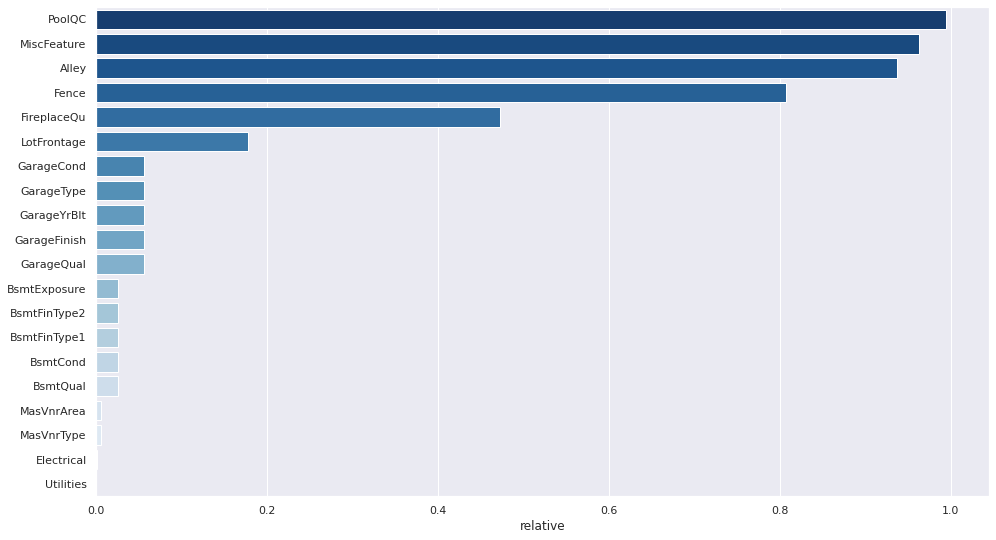

In [10]:
sns.barplot(x=df_train_missing.relative, y=df_train_missing.index, palette="Blues_r")

In [11]:
df_train.isnull().sum().sum()

6965

In [12]:
values = {'Alley': 'No alley access', 'MiscFeature': 'None', 'PoolQC': 'No Pool',
          'Fence': 'No Fence', 'FireplaceQu': 'No Fireplace', 'LotFrontage': 'No Lotfrontage',
         'GarageYrBlt': ' No Garage', 'GarageCond': ' No Garage', 'GarageType': ' No Garage',
          'GarageFinish': ' No Garage', 'GarageQual': ' No Garage'}

df_train.fillna(value=values, inplace=True)

In [13]:
df_train.isnull().sum().sum()

204

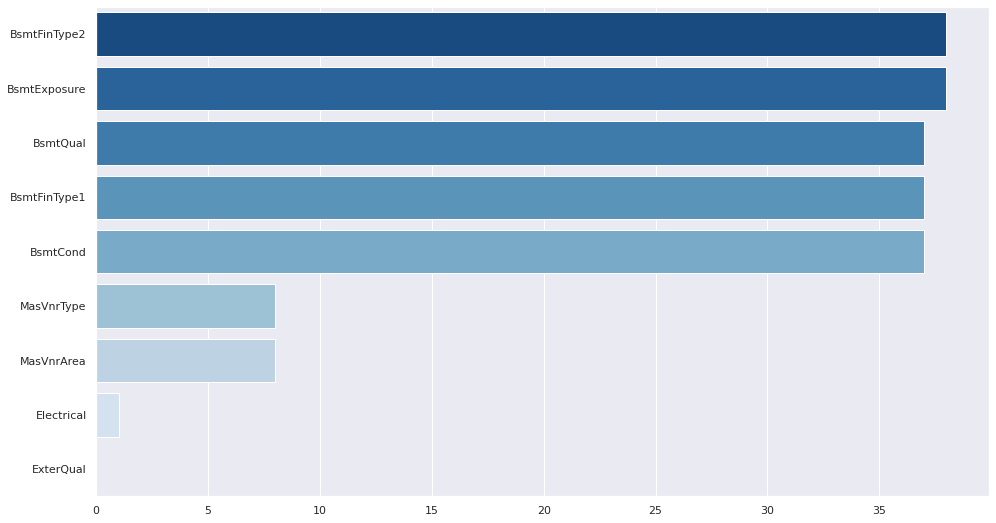

In [14]:
total_missing_values = df_train.isnull().sum().sort_values(ascending=False)[:9]
sns.barplot(x=total_missing_values, y=total_missing_values.index, palette="Blues_r")

#### Conclusion 

In order to avoid introducing biases, the goal is to not drop data points with missing values too liberately. Instead, the focus is on dropping the features themselves, if they are deemed not particularly relevant for the model, or convert them if they actually carry value according to the documentation.

`PoolQC` - pool quality

- according to documentation, `NaN == "No Pool"`
-> missing values reformatted as `No Pool`

`MiscFeature` - Miscellaneous feature not covered in other categories

- according to documentation, `NaN == "No Misc Feature"` -> missing values reformatted as `No Misc Feature`

`Alley` - Type of alley access to property

- according to documentation, `NaN == "No alley access"` -> missing values reformatted as `No alley access`

`Fence` - Fence quality

- according to documentation, `NaN == "No Fence"` -> missing values reformatted as `No Fence`

`FireplaceQu` - Fireplace quality

- according to documentation, `NaN == "No Fireplace"` -> missing values reformatted as `No Fireplace`

`LotFrontage` - Linear feet of street connected to property

- most likely, `NaN == "No LotFrontage"` -> missing values reformatted as `No LotFrontage`

`GarageYrBlt`, `GarageCond`, `GarageType`, `GarageFinish` and `GarageQual`

- most likely, `NaN == "No Garage"` -> missing values reformatted as `No Garage`